In [1]:
import os
from PIL import Image
import torch

from ip_adapter import ConceptrolIPAdapterPlusXL, IPAdapterPlusXL
from ip_adapter.custom_pipelines import StableDiffusionXLCustomPipeline

In [2]:
def image_grid(imgs, rows, cols, res=256):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*res, rows*res))

    for i, img in enumerate(imgs):
        grid.paste(img.resize((res, res)), box=(i%cols*res, i//cols*res))
    return grid

In [3]:
# base_model_path = "RunDiffusion/Juggernaut-XL-v9"
base_model_path = "stabilityai/stable-diffusion-xl-base-1.0"
image_encoder_path = "../human-centric-adapter/models/image_encoder"
ip_adapter_path = "../human-centric-adapter/sdxl_models/ip-adapter-plus_sdxl_vit-h.bin"
device = "cuda"

In [4]:
pipe = StableDiffusionXLCustomPipeline.from_pretrained(
    base_model_path,
    # variant="fp16",
    torch_dtype=torch.float16,
    add_watermarker=False,
)
conceptrol_pipe = ConceptrolIPAdapterPlusXL(pipe, image_encoder_path, ip_adapter_path, device, num_tokens=16, global_masking=True, adaptive_scale_mask=False)
# ip_pipe = IPAdapterPlusXL(pipe, image_encoder_path, ip_adapter_path, device, num_tokens=16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/qiyuan/Conceptrol/ip_adapter/ip_adapter.py:297: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(self.ip_ckpt, map_location="cpu")


[(5, 6)]


  0%|          | 0/50 [00:00<?, ?it/s]

Using global concept mask: down_blocks.1.attentions.0.transformer_blocks.1.attn2.processor
Using global concept mask: down_blocks.1.attentions.1.transformer_blocks.0.attn2.processor
Using global concept mask: down_blocks.1.attentions.1.transformer_blocks.1.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.0.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.1.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.2.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.3.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.4.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.5.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.6.attn2.processor
Using global concept mask: down_blocks.2.attentions.0.transformer_blocks.7.attn2.processor

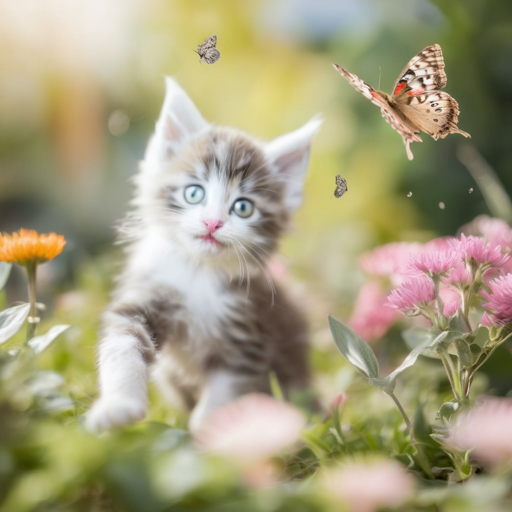

In [5]:
images = [Image.open("../dreambench_plus/data/images/live_subject/animal/00.jpg")]
texts = ["kitten"]
prompts = ["A photo of a kitten chasing a fluttering butterfly in a sunny garden",
           "A photograph of a kitten napping curled up in a cozy basket",
           "A photo of a kitten playfully pouncing on a ball of yarn", 
           "A photograph of a kitten exploring the grass with cautious curiosity",
           "A watercolor painting of a kitten with big, expressive eyes in a playful pose",
           "An anime-style illustration of a kitten with oversized paws and sparkling eyes",
           "A retro-style digital art of a kitten wearing a tiny bow tie and exploring old books",
           "A kitten floating on a leaf down a gentle stream, surrounded by magical glowing fireflies",
           "An illustration of a kitten with tiny angel wings, perched atop a cloud overlooking a sunset"]
negative_prompt = "deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality"
results = conceptrol_pipe.generate(prompt=prompts[0], pil_images=images, subjects=texts, num_samples=1, num_inference_steps=50,
    scale=1.0, negative_prompt=negative_prompt, guidance_scale=6.0, control_guidance_start=0.1, seed=42)
results[0].resize((512, 512))

['hat', 'a man', 'avocado', 'bicycle', 'A young Asian male star', 'low-poly geometric']


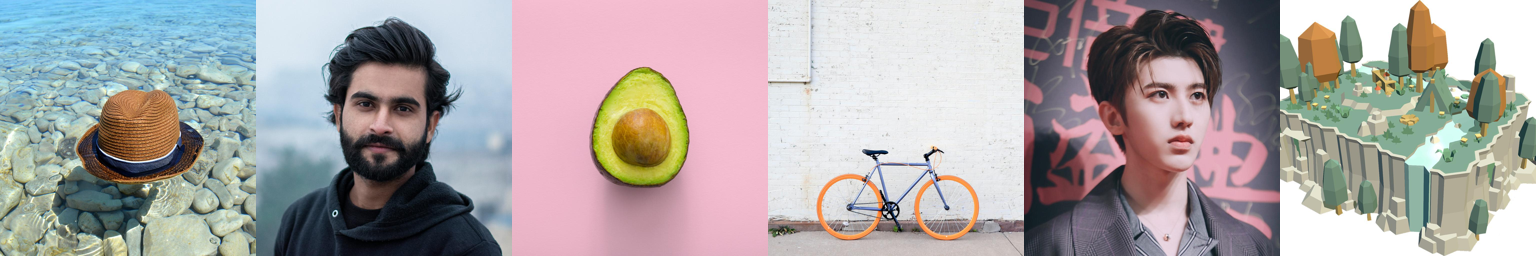

In [6]:
visual_specifications = [Image.open(f"demo_data/visual_specification/0{i}.png") for i in range(len(os.listdir("demo_data/visual_specification")))]
textual_concepts = [open(f"demo_data/textual_concept/0{i}.txt").read() for i in range(len(os.listdir("demo_data/textual_concept")))]

print(textual_concepts)
image_grid(visual_specifications, 1, len(visual_specifications))

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from ip_adapter.attention_processor import attn_mask_logs
print(len(attn_mask_logs))
for key in attn_mask_logs:
    print(key, len(attn_mask_logs[key]))
    print(attn_mask_logs[key][0].shape)
    attn_mask_logs[key] = attn_mask_logs[key][5:7]

70
down_blocks.1.attentions.0.transformer_blocks.0.attn2.processor 50
(4096,)
down_blocks.1.attentions.0.transformer_blocks.1.attn2.processor 50
(4096,)
down_blocks.1.attentions.1.transformer_blocks.0.attn2.processor 50
(4096,)
down_blocks.1.attentions.1.transformer_blocks.1.attn2.processor 50
(4096,)
down_blocks.2.attentions.0.transformer_blocks.0.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.1.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.2.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.3.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.4.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.5.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.6.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.7.attn2.processor 50
(1024,)
down_blocks.2.attentions.0.transformer_blocks.8.attn2.processor 50
(1024,)
down_blocks.2.attentio

70
2


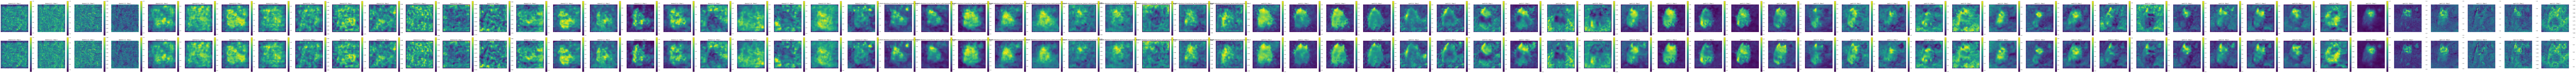

In [16]:
import re
from skimage.transform import resize

def simplify_key_general(key: str) -> str:
    match = re.match(r"(down_blocks|mid_block|up_blocks)\.(\d+)\.attentions\.(\d+)\.transformer_blocks\.(\d+)", key)
    if match:
        block_type = match.group(1).replace("_block", "")  # Extract and simplify block type
        return f"{block_type}{match.group(2)}.{match.group(3)}.{match.group(4)}"
    return key

# Function to reshape, resize, and plot each list as a column
def display_resized_attn_masks(attn_mask_logs, target_shape=(64, 64)):
    n_lists = len(attn_mask_logs)
    print(n_lists)
    max_items = max(len(items) for items in attn_mask_logs.values())
    print(max_items)
    fig, axs = plt.subplots(max_items, n_lists, figsize=(n_lists * 5, max_items * 5))
    if n_lists == 1:
        axs = np.expand_dims(axs, axis=1)  # Ensure axs is 2D for consistent indexing
    elif max_items == 1:
        axs = np.expand_dims(axs, axis=0)
    
    for col, (key, arrays) in enumerate(attn_mask_logs.items()):
        for row, array in enumerate(arrays):
            reshaped_array = resize(array.reshape(-1, int(array.size ** 0.5)), target_shape, mode="constant", anti_aliasing=True)
            ax = axs[row, col] if max_items > 1 else axs[col]
            im = ax.imshow(reshaped_array, cmap="viridis")
            ax.set_title(f"{simplify_key_general(key)} - Step {row + 1}")
            fig.colorbar(im, ax=ax)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display the attention masks with resizing
display_resized_attn_masks(attn_mask_logs)